In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
sonar_data = pd.read_csv('sonar_data.csv', header=None, na_values='--')

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe() #gives statistical measures of data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data[60].value_counts()  #counting the rocks and mines showing in 60th column

60
M    111
R     97
Name: count, dtype: int64

M -> Mine \
R -> Rock

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [9]:
#separating data and labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [10]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, stratify=Y, random_state=1
)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [13]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

In [14]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [15]:
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# The .fit() function makes the model learn the patterns in X_train (features) and match them with Y_train (labels).
# The model will adjust its internal parameters (weights) to minimize errors and make better predictions.

In [17]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.8502673796791443


In [18]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# model.predict(X_test) → Uses the trained model to predict labels for X_test.
# accuracy_score(X_test_prediction, Y_test) → Compares predicted labels with actual labels (Y_test) to calculate accuracy.
# Output (test_data_accuracy) → A number between 0 and 1, representing model accuracy (e.g., 0.85 means 85% accuracy).

In [19]:
print('Accuracy on test data: ',test_data_accuracy)

Accuracy on test data:  0.6190476190476191


In [68]:
def predict_object(input_data, model):
    # Convert input_data to a NumPy array
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Reshape for a single instance prediction
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # Predict using the trained model
    prediction = model.predict(input_data_reshaped)
    
    # Return result
    return "The object is a Rock" if prediction[0] == 'R' else "The object is a Mine"


input_values = (0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664, 0.1460, 0.2792, 
                0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339, 0.8230, 0.9173, 0.9975, 0.9911, 
                0.8240, 0.6498, 0.5980, 0.4862, 0.3150, 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 
                0.2694, 0.2930, 0.2925, 0.3998, 0.3660, 0.3172, 0.4609, 0.4374, 0.1820, 0.3376, 
                0.6202, 0.4448, 0.1863, 0.1420, 0.0589, 0.0576, 0.0672, 0.0269, 0.0245, 0.0190, 
                0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152, 0.0052, 0.0121, 0.0124, 0.0055)


result = predict_object(input_values, model)
print(result)


The object is a Mine


In [74]:
input_values = (0.0124, 0.0433, 0.0604, 0.0449, 0.0597, 0.0355, 0.0531, 0.0343, 0.1052, 0.212, 
              0.164, 0.1901, 0.3026, 0.2019, 0.0592, 0.239, 0.3657, 0.3809, 0.5929, 0.6299, 
              0.5801, 0.4574, 0.4449, 0.3691, 0.6446, 0.894, 0.8978, 0.498, 0.3333, 0.235, 
              0.1553, 0.3666, 0.434, 0.3082, 0.3024, 0.4109, 0.5501, 0.4129, 0.5499, 0.5018, 
              0.3132, 0.2802, 0.2351, 0.2298, 0.1155, 0.0724, 0.0621, 0.0318, 0.045, 0.0167, 
              0.0078, 0.0083, 0.0057, 0.0174, 0.0188, 0.0054, 0.0114, 0.0196, 0.0147, 0.0062)
result = predict_object(input_values, model)
print(result)

The object is a Rock



# Visual Representation


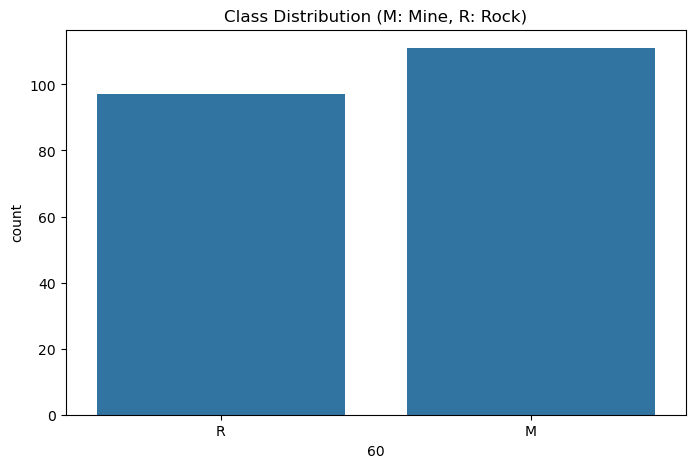

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=sonar_data[60])  # Creates bar chart of Rock vs Mine counts
plt.title("Class Distribution (M: Mine, R: Rock)")
plt.show()

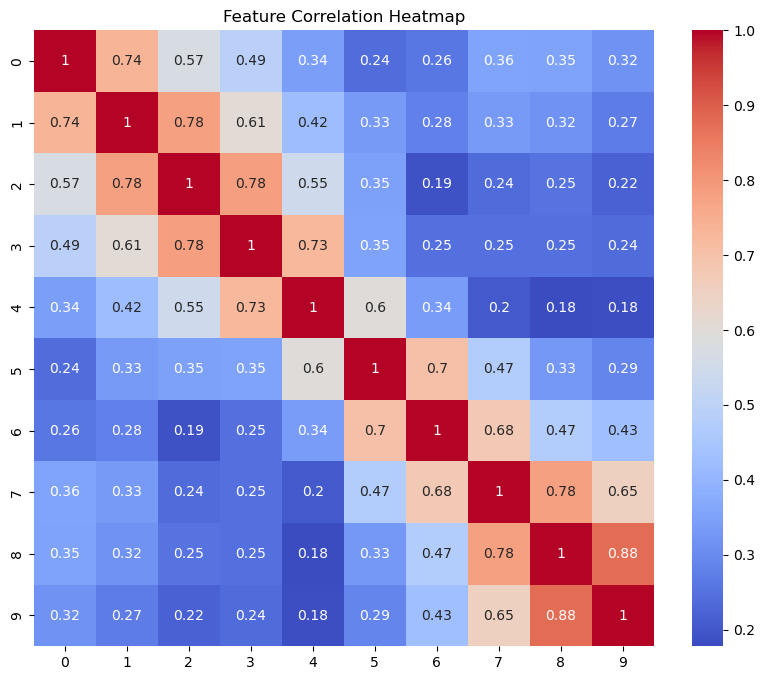

In [25]:

plt.figure(figsize=(10,8))
# Handle missing values before plotting
sns.heatmap(sonar_data.iloc[:, :10].dropna().corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Comparison

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [27]:
# Replace undefined 'model_score' with 'accuracy_score'
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)  # Generate predictions
    acc = accuracy_score(Y_test, Y_pred)  # Correct function
    print(f"{name} Test Accuracy: {acc:.2%}")

Logistic Regression Test Accuracy: 76.19%
Random Forest Test Accuracy: 71.43%
SVM Test Accuracy: 80.95%


# Advanced Evaluation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
# Classification Report
print("\n Classification Report:")
print(classification_report(Y_test, X_test_prediction))  # Precision/Recall metrics
# Precision: Out of all the times the model predicted something was a mine, how many were actually mines.
# Recall: Out of all the actual mines, how many did the model correctly identify.
# F1-score: A balance between precision and recall.
# Support: The number of actual occurrences of each class in the dataset.


 Classification Report:
              precision    recall  f1-score   support

           M       0.67      0.55      0.60        11
           R       0.58      0.70      0.64        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21



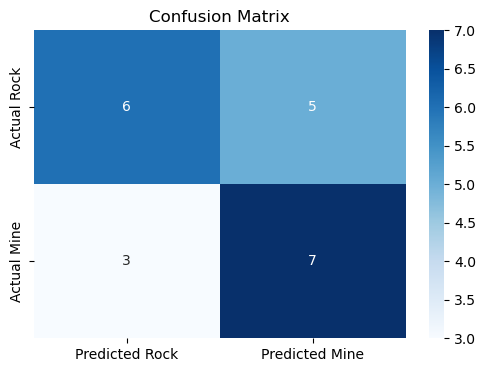

In [31]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Rock', 'Predicted Mine'],
            yticklabels=['Actual Rock', 'Actual Mine'])
plt.title("Confusion Matrix")
plt.show()

# Feature Importance

In [33]:
# Get coefficients from LOGISTIC REGRESSION (not SVM)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lr_model.coef_[0]  # Now using logistic regression
}).sort_values('Importance', ascending=False)


How to Read:
- Features on RIGHT (blue) suggest MINE detection
- Features on LEFT (red) suggest ROCK detection
- Distance from center shows importance strength
- Larger dots = More influential features


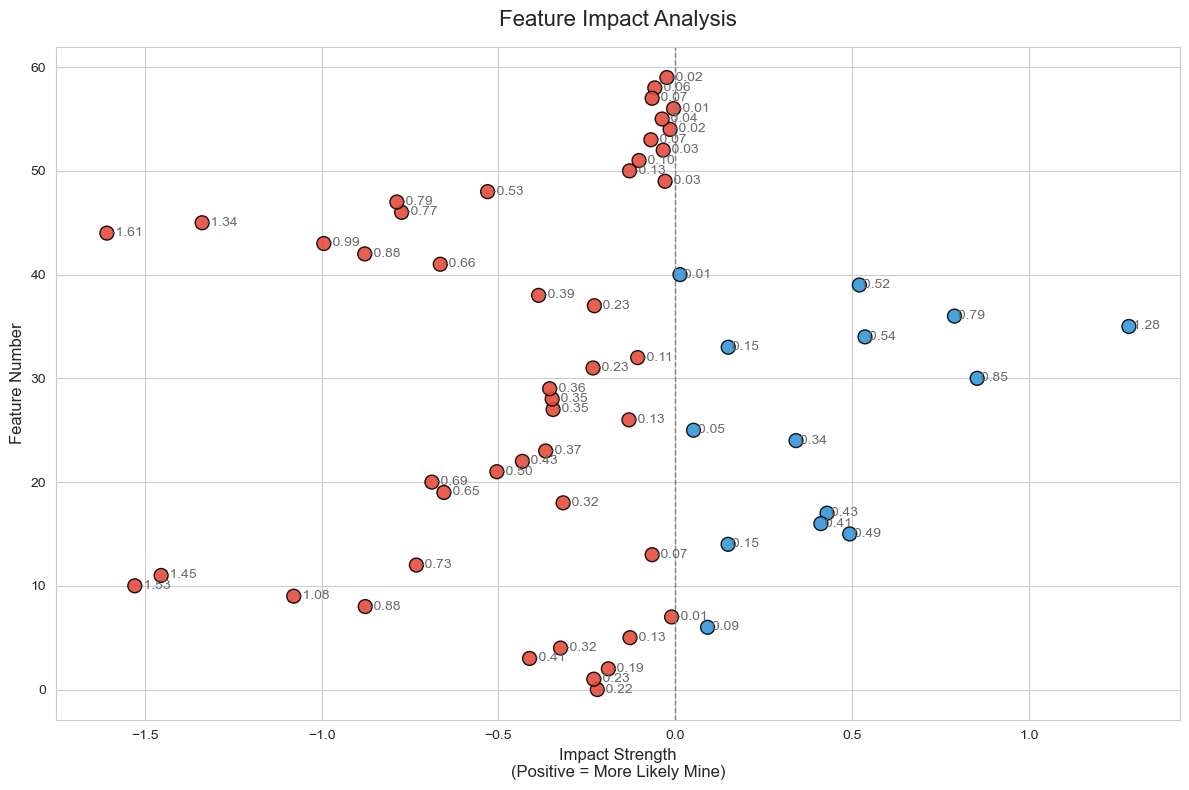

In [34]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create color coding (blue = positive impact for Mines, red = negative impact for Rocks)
colors = ['#3498db' if x > 0 else '#e74c3c' for x in coef_df['Importance']]

# Create dot plot
plt.scatter(coef_df['Importance'], coef_df.index, 
           c=colors, s=100, edgecolor='black', alpha=0.9)

# Add reference line
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Add labels
plt.title("Feature Impact Analysis", fontsize=16, pad=15)
plt.xlabel("Impact Strength\n(Positive = More Likely Mine)", fontsize=12)
plt.ylabel("Feature Number", fontsize=12)

# Add value labels
for i, row in coef_df.iterrows():
    plt.text(row['Importance'], i, 
             f' {row["Importance"]:.2f}', 
             va='center', 
             fontsize=10,
             color='dimgray')
print("How to Read:")
print("- Features on RIGHT (blue) suggest MINE detection")
print("- Features on LEFT (red) suggest ROCK detection")
print("- Distance from center shows importance strength")
print("- Larger dots = More influential features")
plt.tight_layout()
plt.show()